In [1]:
library('igraph')
library('Matrix')
library('pracma')
set.seed(1)


Attaching package: ‘igraph’


The following objects are masked from ‘package:stats’:

    decompose, spectrum


The following object is masked from ‘package:base’:

    union



Attaching package: ‘pracma’


The following objects are masked from ‘package:Matrix’:

    expm, lu, tril, triu




## Erdős–Rényi Model

Create undirected random networks with n = 1000 nodes, and the probability p for drawing an edge between two arbitrary vertices 0.003, 0.004, 0.01, 0.05, and 0.1. Plot the degree distributions.

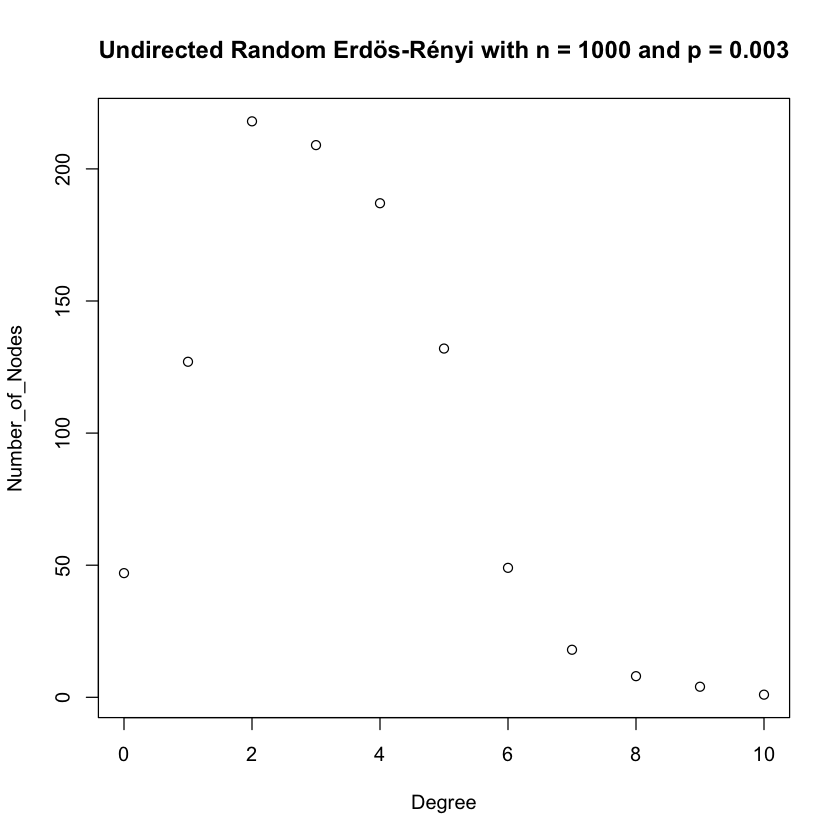

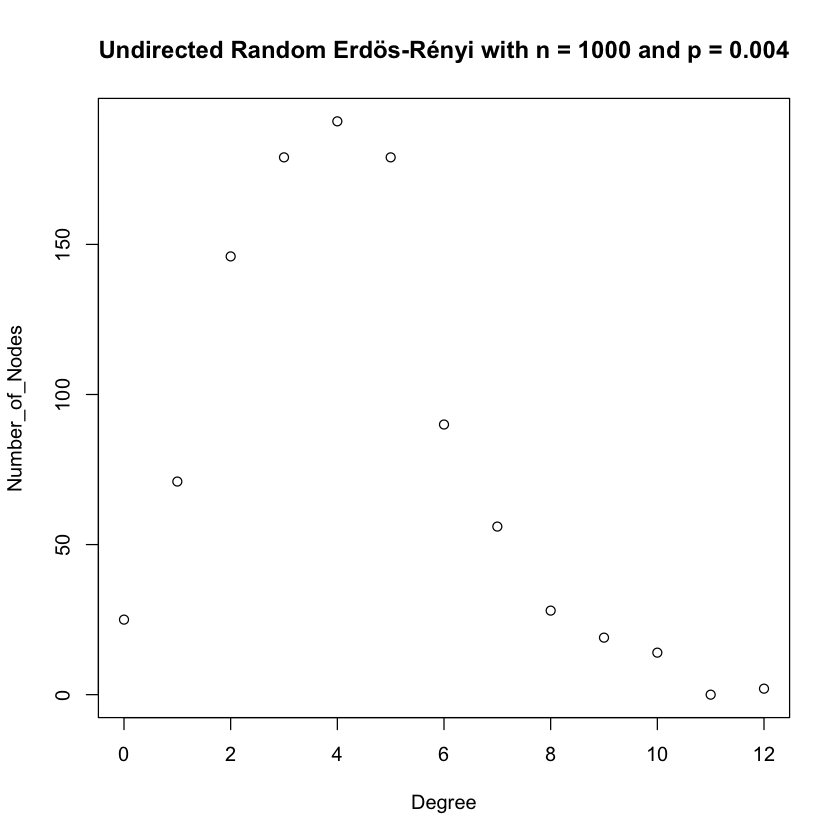

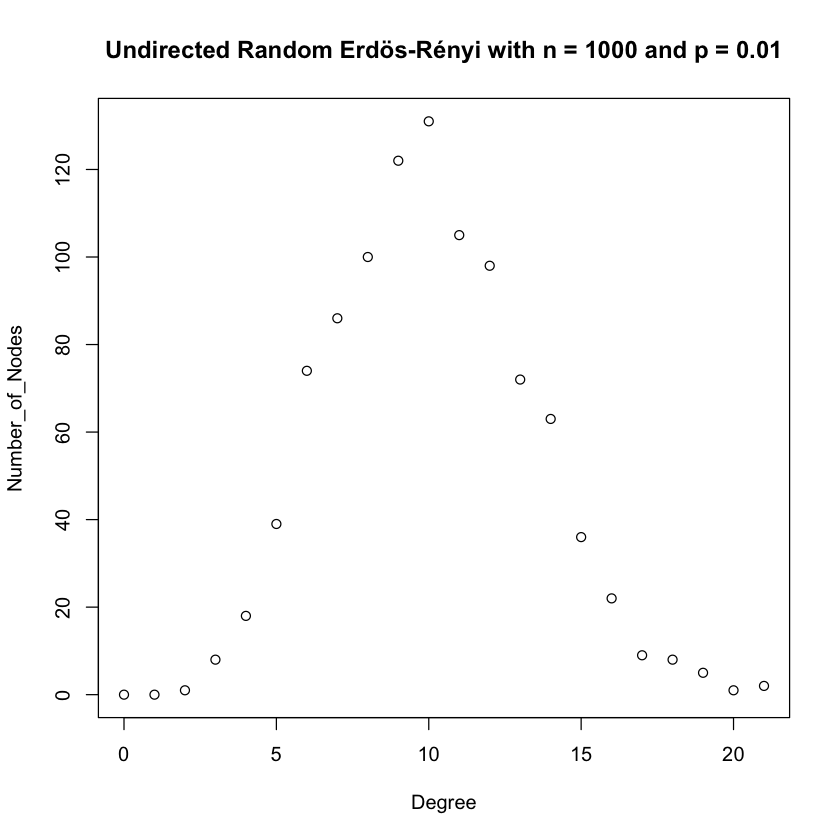

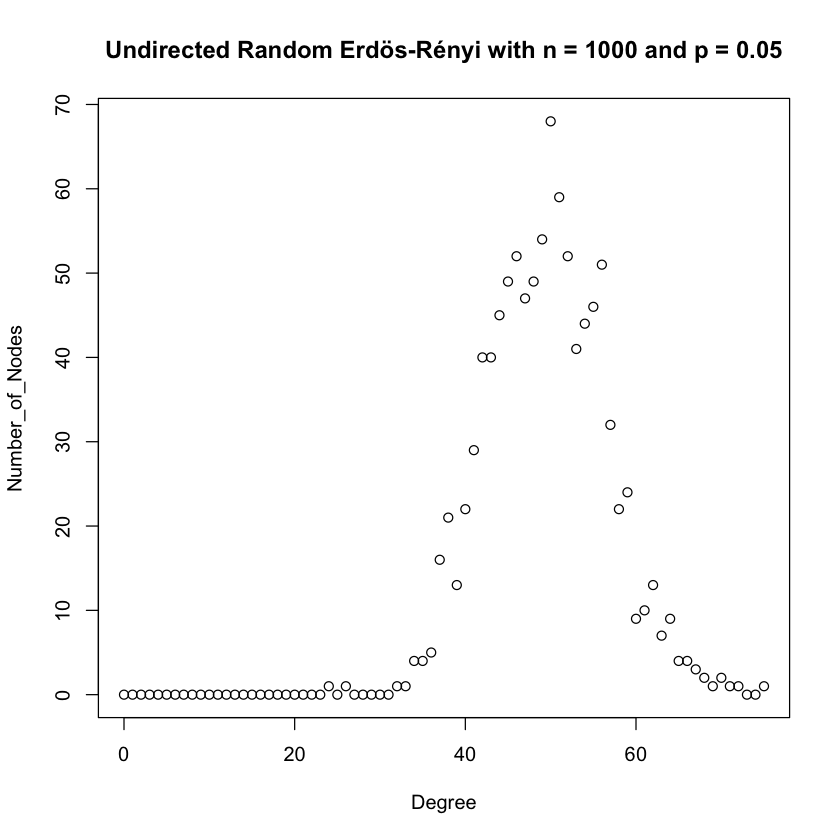

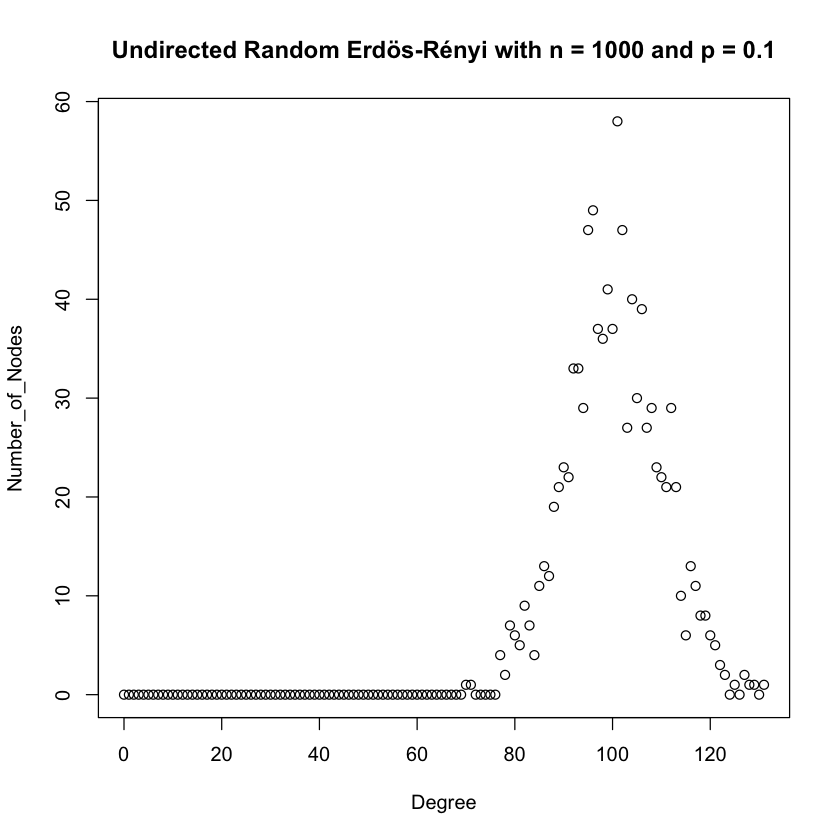

In [2]:
n = 1000
prob_list = c(0.003, 0.004, 0.01, 0.05, 0.1)
prob_len = length(prob_list)
dd_list = list(1:prob_len)
g_list = list(1:prob_len)
for (i in 1:prob_len){
    g_np = sample_gnp(n=n, p=prob_list[i], directed = FALSE)
    g_list[[i]] = g_np 
    dd = degree_distribution(g_np) * n
    dd_list[[i]] = dd 
    dd.data = data.frame(
       Degree = 0:(length(dd)-1),
        Number_of_Nodes = dd
)
    
    plot(dd.data, main = paste0("Undirected Random Erdös-Rényi with n = 1000 and p = ", prob_list[i]))
}

What distribution is observed? Explain why. 

In [3]:
for (i in 1:prob_len){
    cat("degree distribution for p =", prob_list[i], ":", dd_list[[i]], "\n")
    }

degree distribution for p = 0.003 : 47 127 218 209 187 132 49 18 8 4 1 
degree distribution for p = 0.004 : 25 71 146 179 191 179 90 56 28 19 14 0 2 
degree distribution for p = 0.01 : 0 0 1 8 18 39 74 86 100 122 131 105 98 72 63 36 22 9 8 5 1 2 
degree distribution for p = 0.05 : 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 1 0 0 0 0 0 1 1 4 4 5 16 21 13 22 29 40 40 45 49 52 47 49 54 68 59 52 41 44 46 51 32 22 24 9 10 13 7 9 4 4 3 2 1 2 1 1 0 0 1 
degree distribution for p = 0.1 : 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 0 0 0 0 0 4 2 7 6 5 9 7 4 11 13 12 19 21 23 22 33 33 29 47 49 37 36 41 37 58 47 27 40 30 39 27 29 23 22 21 29 21 10 6 13 11 8 8 6 5 3 2 0 1 0 2 1 1 0 1 


Also, report the mean and variance of the degree distributions and compare them to the theoretical values.

In [4]:
for (i in 1:prob_len){
    mu = dot(dd_list[[i]], c(0:(length(dd_list[[i]])-1))) /  n
    dd_var = dot((c(0:(length(dd_list[[i]])-1)) - mu)^2, dd_list[[i]]) / n
    th_mu = n*prob_list[i]
    th_dd_var = n*prob_list[i]*(1 - prob_list[i])
    cat("mean degree and variance for p =", prob_list[i], ":", mu, "and" , dd_var, "\n")
    cat("binomial mean degree and variance for p =", prob_list[i], ":", th_mu, "and" , th_dd_var, "\n")
    cat("poisson mean degree and variance for p =", prob_list[i], ":", th_mu, "and" , th_mu, "\n")
    print(data.frame(mean=c(mu, th_mu, th_mu), var=c(dd_var, th_dd_var, th_mu)))
}

mean degree and variance for p = 0.003 : 3.128 and 2.969616 
binomial mean degree and variance for p = 0.003 : 3 and 2.991 
poisson mean degree and variance for p = 0.003 : 3 and 3 
   mean      var
1 3.128 2.969616
2 3.000 2.991000
3 3.000 3.000000
mean degree and variance for p = 0.004 : 4.05 and 4.3975 
binomial mean degree and variance for p = 0.004 : 4 and 3.984 
poisson mean degree and variance for p = 0.004 : 4 and 4 
  mean    var
1 4.05 4.3975
2 4.00 3.9840
3 4.00 4.0000
mean degree and variance for p = 0.01 : 10.042 and 10.10224 
binomial mean degree and variance for p = 0.01 : 10 and 9.9 
poisson mean degree and variance for p = 0.01 : 10 and 10 
    mean      var
1 10.042 10.10224
2 10.000  9.90000
3 10.000 10.00000
mean degree and variance for p = 0.05 : 49.546 and 47.60788 
binomial mean degree and variance for p = 0.05 : 50 and 47.5 
poisson mean degree and variance for p = 0.05 : 50 and 50 
    mean      var
1 49.546 47.60788
2 50.000 47.50000
3 50.000 50.00000
mean deg

For each p and n = 1000, answer the following questions:
Are all random realizations of the ER network connected? Numerically estimate the probability that a generated network is connected. 

In [5]:
prob_list = c(0.003, 0.004, 0.01, 0.05, 0.1)
prob_len = length(prob_list)
for (i in 1:prob_len){
    cat("Undirected Random Erdös-Rényi with n = 1000 and p = ", prob_list[i], "\n")
#     cat("# of vertices:", vcount(g_list[[i]]), "\n")
#     cat("# of edges:", ecount(g_list[[i]]), "\n")
    cat("Is connected:", is_connected(g_list[[i]]), "\n")
    cat("GCC size:", clusters(g_list[[i]])$csize[1], "\n")
    cat("GCC diameter:", diameter(g_list[[i]]), "\n")
    }

Undirected Random Erdös-Rényi with n = 1000 and p =  0.003 
Is connected: FALSE 
GCC size: 1 
GCC diameter: 14 
Undirected Random Erdös-Rényi with n = 1000 and p =  0.004 
Is connected: FALSE 
GCC size: 973 
GCC diameter: 11 
Undirected Random Erdös-Rényi with n = 1000 and p =  0.01 
Is connected: TRUE 
GCC size: 1000 
GCC diameter: 5 
Undirected Random Erdös-Rényi with n = 1000 and p =  0.05 
Is connected: TRUE 
GCC size: 1000 
GCC diameter: 3 
Undirected Random Erdös-Rényi with n = 1000 and p =  0.1 
Is connected: TRUE 
GCC size: 1000 
GCC diameter: 3 


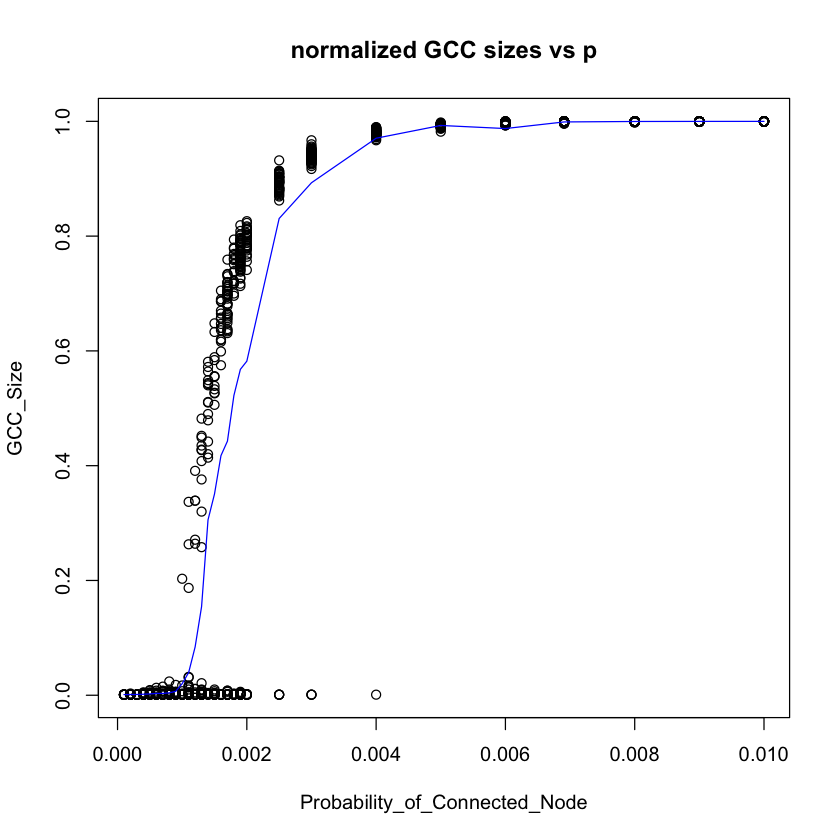

In [6]:
n = 1000
prob_list = c(0.0001, 0.0002, 0.0003, 0.0004, 0.0005, 0.0006, 0.0007, 0.0008, 0.0009, 0.001, 0.0011, 0.0012, 0.0013, 0.0014, 0.0015, 0.0016,  0.0017, 0.0018, 0.0019, 0.002, 0.0025, 0.003, 0.004, 0.005, 0.006, 0.00690775527, 0.008, 0.009,  0.01)
# prob_list = c(0.002, 0.0025, 0.003, 0.0035, 0.004, 0.0045, 0.005, 0.0055, 0.006, 0.0065, 0.00690775527)

prob_len = length(prob_list)
iter = 100
GCC_Size = c(1:prob_len*iter)
Probability_of_Connected_Node = c(1:prob_len*iter)
avg_gcc = c(1:prob_len)

for (i in 1:prob_len){
    gcc_list = c(1:iter)
    for (j in 1:iter){
        g_np = sample_gnp(n=n, p=prob_list[i], directed = FALSE)
        gcc = clusters(g_np)$csize[1]/n
        gcc_list[j] = gcc
        GCC_Size[i*j] = gcc
        Probability_of_Connected_Node[i*j] = prob_list[i]
    }
    avg_gcc[i] = mean(gcc_list)
}

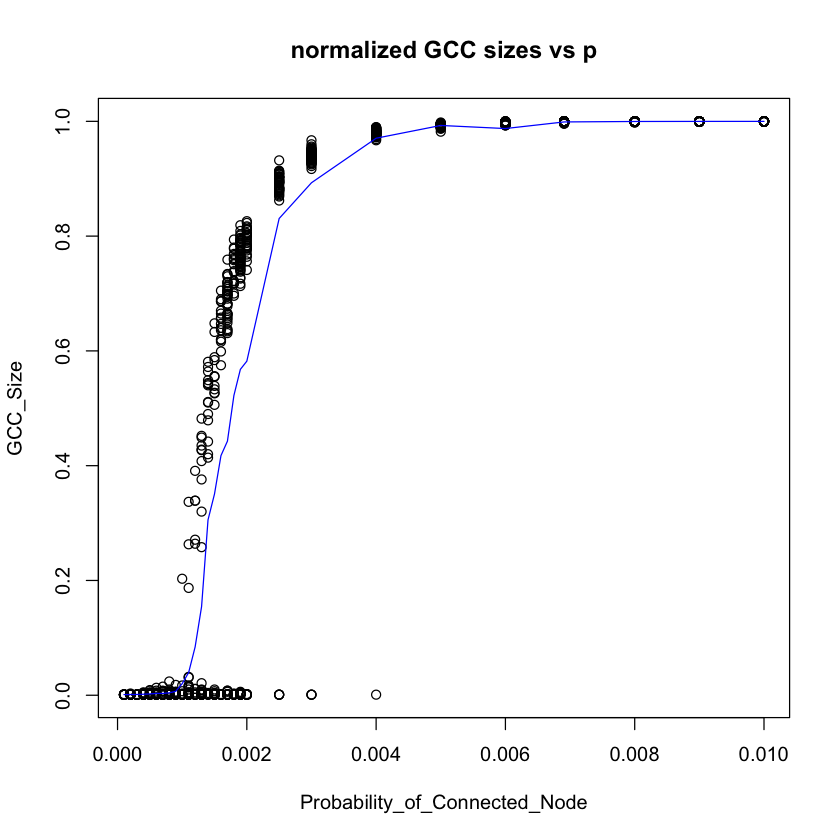

In [7]:
plot(Probability_of_Connected_Node, GCC_Size, main="normalized GCC sizes vs p") #, ylim=c(0.995,1))
lines(prob_list,avg_gcc,col="blue")

Define the average degree of nodes c = n × p = 0.5. Sweep over the number of nodes, n, ranging from 100 to 10000. Plot the expected size of the GCC of ER networks with n nodes and edge-formation probabilities p = c/n, as a function of n. What trend is observed?

In [351]:
const = 0.5
n_list = c(100, 150, 200, 250, 300, 400, 500, 600, 700, 800, 900, 1000, 1500, 2000, 2500, 3000, 4000, 5000, 6000, 7000, 8000, 9000, 10000)
prob_list = const / n_list 

prob_len = length(prob_list)
iter = 1000
avg_gcc = c(1:prob_len)

for (i in 1:prob_len){
    gcc_list = c(1:iter)
    for (j in 1:iter){
        g_np = sample_gnp(n=n_list[i], p=prob_list[i], directed = FALSE)
        gcc = clusters(g_np)$csize[1]/n_list[i]
        gcc_list[j] = gcc
    }
    avg_gcc[i] = mean(gcc_list)
}

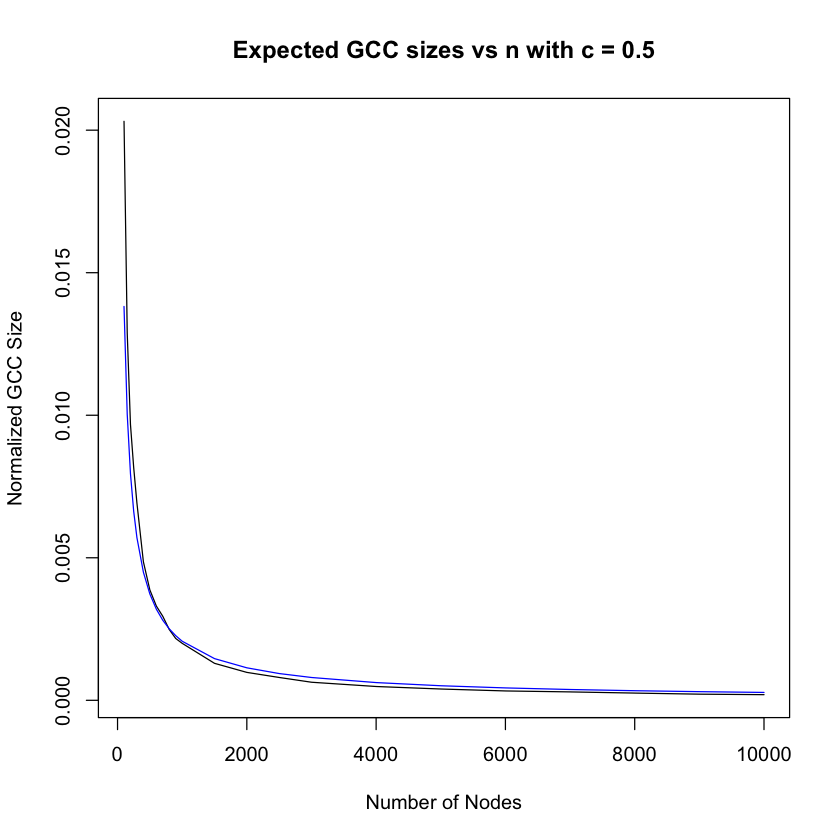

In [356]:
plot(n_list, avg_gcc, type = "l", main="Expected GCC sizes vs n with c = 0.5", ylab="Normalized GCC Size", xlab="Number of Nodes")
lines(n_list,0.3*log(n_list)/n_list,col="blue")
# lines(n_list,1/(n_list),col="green")
# lines(n_list,(n_list^(1/3))/n_list,col="red")

Repeat the same for c = 1.

In [364]:
const = 1
n_list = c(100, 150, 200, 250, 300, 400, 500, 600, 700, 800, 900, 1000, 1500, 2000, 2500, 3000, 4000, 5000, 6000, 7000, 8000, 9000, 10000)
prob_list = const / n_list 

prob_len = length(prob_list)
iter = 1000
avg_gcc1 = c(1:prob_len)

for (i in 1:prob_len){
    gcc_list = c(1:iter)
    for (j in 1:iter){
        g_np = sample_gnp(n=n_list[i], p=prob_list[i], directed = FALSE)
        gcc = clusters(g_np)$csize[1]/n_list[i]
        gcc_list[j] = gcc
    }
    avg_gcc1[i] = mean(gcc_list)
}

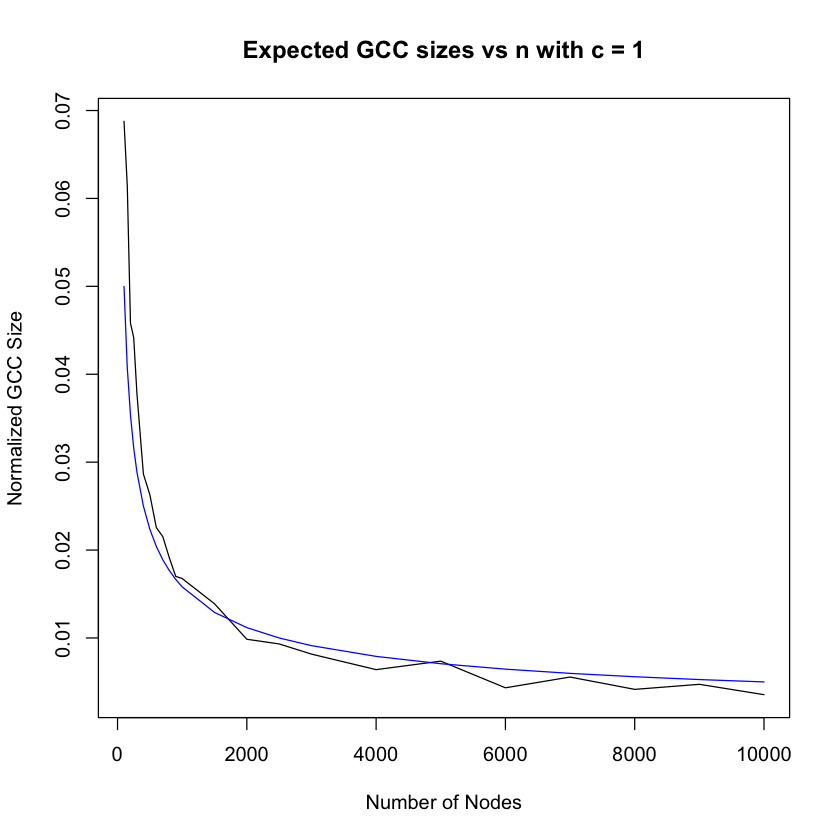

In [365]:
plot(n_list, avg_gcc1, type = "l", main="Expected GCC sizes vs n with c = 1", ylab="Normalized GCC Size", xlab="Number of Nodes")
# lines(n_list,log(n_list)/n_list,col="blue")
# lines(n_list,1/(n_list),col="green")
# lines(n_list,(n_list^(2/3))/n_list,col="red")
lines(n_list,(0.5*n_list^(1/2))/n_list,col="blue")

Repeat the same for values of c = 1.1,1.2,1.3, and show the results for these three values in a single plot.

In [382]:
const_list = c(1.1, 1.2, 1.3, 1.4, 1.5)
n_list = c(100, 150, 200, 250, 300, 400, 500, 600, 700, 800, 900, 1000, 1500, 2000, 2500, 3000, 4000, 5000, 6000, 7000, 8000, 9000, 10000)
iter = 1000
avg_list = list(1:length(const_list))
for (k in 1:length(const_list)){
    prob_list = const_list[k] / n_list 
    prob_len = length(prob_list)
    avg_gcc = c(1:prob_len)

    for (i in 1:prob_len){
        gcc_list = c(1:iter)
        for (j in 1:iter){
            g_np = sample_gnp(n=n_list[i], p=prob_list[i], directed = FALSE)
            gcc = clusters(g_np)$csize[1]/n_list[i]
            gcc_list[j] = gcc
        }
        avg_gcc[i] = mean(gcc_list)
    }
    avg_list[[k]] = avg_gcc
}

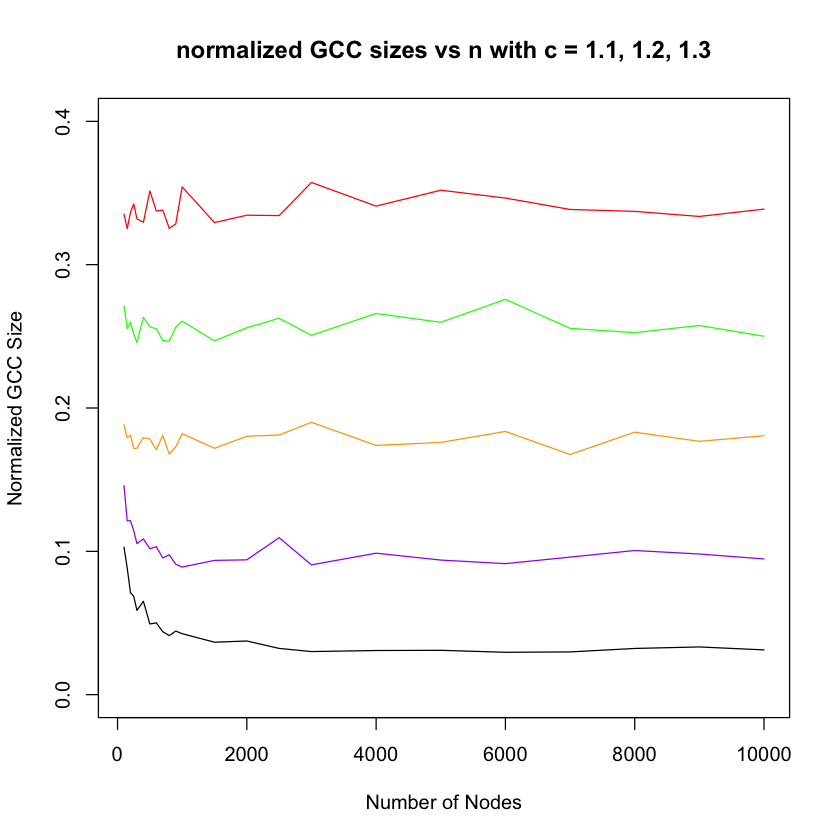

In [391]:
plot(n_list, avg_list[[1]], type="l", main="normalized GCC sizes vs n with c = 1.1, 1.2, 1.3", ylab="Normalized GCC Size", xlab="Number of Nodes", ylim=c(0.0,0.4))
lines(n_list,avg_list[[2]],col="purple")
lines(n_list,avg_list[[3]],col="orange")
lines(n_list,avg_list[[4]],col="green")
lines(n_list,avg_list[[5]],col="red")
# lines(n_list,avg_gcc1,col="pink")
# lines(n_list,1/(n_list),col="green")
# lines(n_list,sqrt(n_list)/n_list,col="red")
# lines(n_list,(0.5*n_list^(2/3))/n_list,col="blue")

In [399]:
print(mean(avg_list[[1]][-c(1:13)]))
print(mean(avg_list[[2]][-c(1:13)]))
print(mean(avg_list[[3]]))
print(mean(avg_list[[4]]))
print(mean(avg_list[[5]]))

[1] 0.03177177
[1] 0.09675612
[1] 0.1777963
[1] 0.2566524
[1] 0.3381945


## Preferential Attachment Model

Create an undirected network with n = 1000 nodes, with preferential attachment model, where each new node attaches to m = 1 old nodes. Is such a network always connected?

In [410]:
n = 1000
m = 1
g_pa = sample_pa(n=n, m=m, directed = FALSE)
cat("Is connected:", is_connected(g_pa), "\n")

Is connected: TRUE 


Use fast greedy method to find the community structure. Measure modularity.

In [411]:
comm = cluster_fast_greedy(g_pa)
mod = modularity(comm)
print(mod)

[1] 0.9306243


Try to generate a larger network with 10000 nodes using the same model. Compute modularity. How is it compared to the smaller network’s modularity?

In [412]:
n = 10000
m = 1
g_pa2 = sample_pa(n=n, m=m, directed = FALSE)
cat("Is connected:", is_connected(g_pa2), "\n")
comm2 = cluster_fast_greedy(g_pa2)
mod2 = modularity(comm2)
print(mod2)

Is connected: TRUE 
[1] 0.9785646


Plot the degree distribution in a log-log scale for both n = 1000, 10000, then estimate the slope of the plot using linear regression.

Warning message in xy.coords(x, y, xlabel, ylabel, log):
“1 x value <= 0 omitted from logarithmic plot”
Warning message in xy.coords(x, y, xlabel, ylabel, log):
“14 y values <= 0 omitted from logarithmic plot”


(Intercept)      lnodes 
 -0.1972751  -2.2000229 


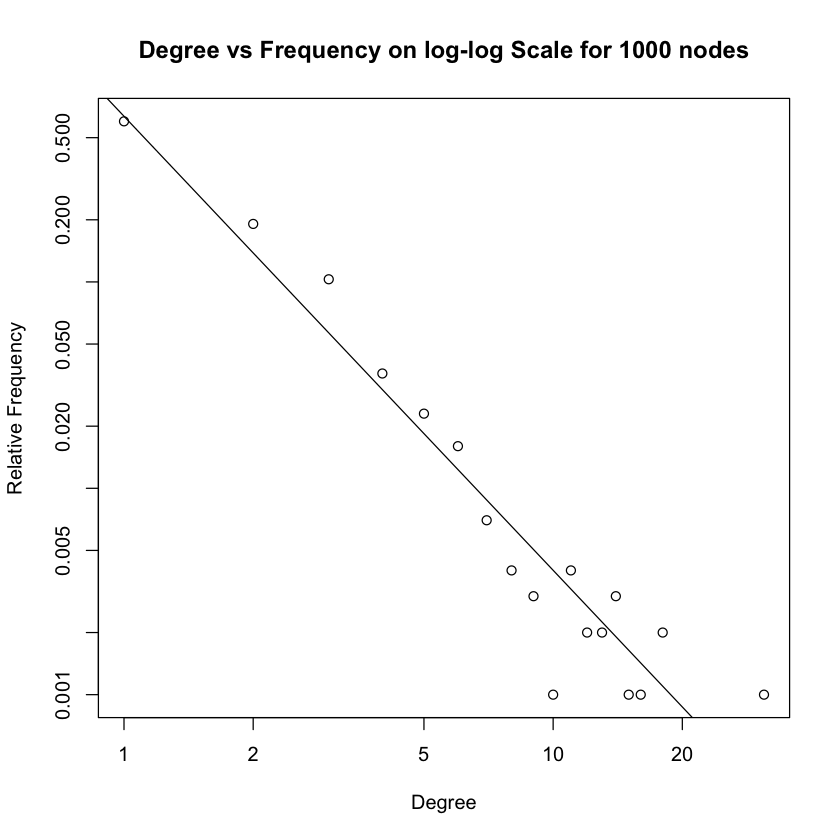

In [413]:
dd = degree_distribution(g_pa, mode="all")
nodes = c(0:(length(dd)-1))

ldd = log(dd,base=10)
to_remove = which(ldd == -Inf)
ldd = ldd[-to_remove]
lnodes = log(nodes[-to_remove],base=10)
coeff = lm(ldd~lnodes)$coefficients
plot(dd~nodes, log="xy", main="Degree vs Frequency on log-log Scale for 1000 nodes", xlab="Degree", ylab="Relative Frequency") 
reg=lm(ldd~lnodes)
abline(coeff[1], coeff[2])
print(coeff)

Warning message in xy.coords(x, y, xlabel, ylabel, log):
“1 x value <= 0 omitted from logarithmic plot”
Warning message in xy.coords(x, y, xlabel, ylabel, log):
“49 y values <= 0 omitted from logarithmic plot”


(Intercept)      lnodes 
-0.02229205 -2.57765047 
 [1] 0.0000 0.6009 0.2002 0.0845 0.0430 0.0245 0.0122 0.0097 0.0063 0.0034
[11] 0.0036 0.0022 0.0015 0.0019 0.0007 0.0013 0.0004 0.0002 0.0004 0.0006
[21] 0.0003 0.0005 0.0001 0.0001 0.0003 0.0002 0.0003 0.0001 0.0001 0.0001
[31] 0.0001 0.0000 0.0000 0.0000 0.0000 0.0000 0.0000 0.0002 0.0000 0.0000
[41] 0.0000 0.0000 0.0000 0.0000 0.0000 0.0000 0.0000 0.0000 0.0000 0.0000
[51] 0.0000 0.0000 0.0000 0.0000 0.0000 0.0000 0.0000 0.0000 0.0000 0.0000
[61] 0.0000 0.0000 0.0000 0.0000 0.0000 0.0000 0.0000 0.0000 0.0000 0.0000
[71] 0.0000 0.0000 0.0000 0.0000 0.0000 0.0000 0.0000 0.0000 0.0000 0.0000
[81] 0.0001


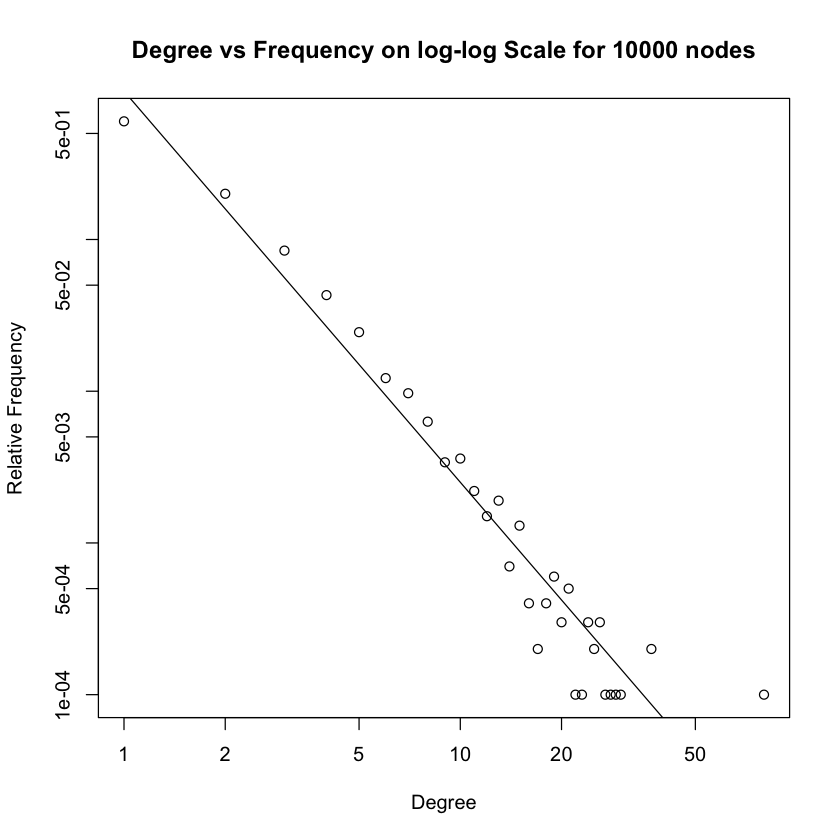

In [416]:
dd2 = degree_distribution(g_pa2)
nodes = c(0:(length(dd2)-1))

ldd = log(dd2,base=10)
to_remove = which(ldd == -Inf)
ldd = ldd[-to_remove]
lnodes = log(nodes[-to_remove],base=10)
coeff = lm(ldd~lnodes)$coefficients
plot(dd2~nodes, log="xy", main="Degree vs Frequency on log-log Scale for 10000 nodes", xlab="Degree", ylab="Relative Frequency")  
reg=lm(ldd~lnodes)
abline(coeff[1], coeff[2])
print(coeff)
print(dd2)

In the two networks generated, perform the following:
Randomly pick a node i, and then randomly pick a neighbor j of that node. Plot the degree distribution of nodes j that are picked with this process, in the log-log scale. Is the distribution linear in the log-log scale? If so, what is the slope? How does this differ from the node degree distribution?	

In [417]:
iter = 1000
degree_list = c(1:iter)
for (i in 1:iter){
    i_node = sample(c(1:1000), size=1)
#     print(i_node)
    j_cand = neighbors(g_pa, i_node)
#     print(j_cand)
    j_node = sample(j_cand, size=1)
#     print(degree(g_pa, j_node))
    degree_list[i] = degree(g_pa, j_node)
}
dd3 = cbind(table(degree_list))/1000
# print(dd3)
nodes = as.integer(names(table(degree_list)))
# print(nodes)

(Intercept)      lnodes 
  -0.574624   -1.107642 


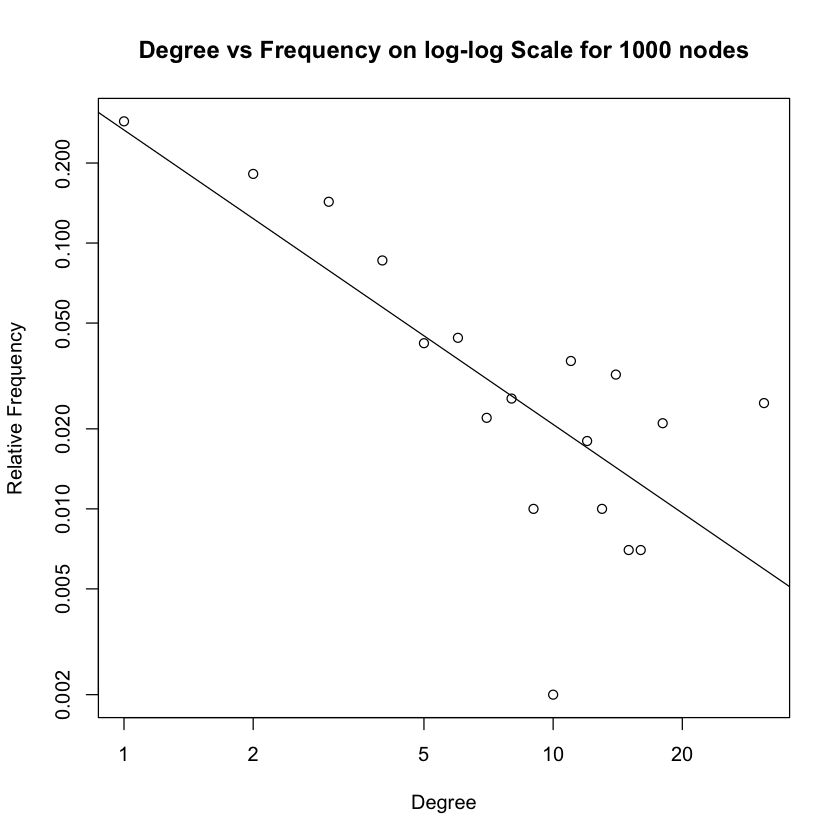

In [419]:
ldd = log(dd3,base=10)
lnodes = log(nodes,base=10)

coeff = lm(ldd~lnodes)$coefficients
plot(dd3~nodes, log="xy", main="Degree vs Frequency on log-log Scale for 1000 nodes", xlab="Degree", ylab="Relative Frequency")  
reg=lm(ldd~lnodes)
abline(coeff[1], coeff[2])
print(coeff)

In [420]:
iter = 1000
degree_list = c(1:iter)
for (i in 1:iter){
    i_node = sample(c(1:1000), size=1)
#     print(i_node)
    j_cand = neighbors(g_pa2, i_node)
#     print(j_cand)
    j_node = sample(j_cand, size=1)
#     print(degree(g_pa, j_node))
    degree_list[i] = degree(g_pa2, j_node)
}
dd4 = cbind(table(degree_list))/10000
# print(dd4)
nodes = as.integer(names(table(degree_list)))
# print(nodes)

(Intercept)      lnodes 
  -1.579651   -1.176653 


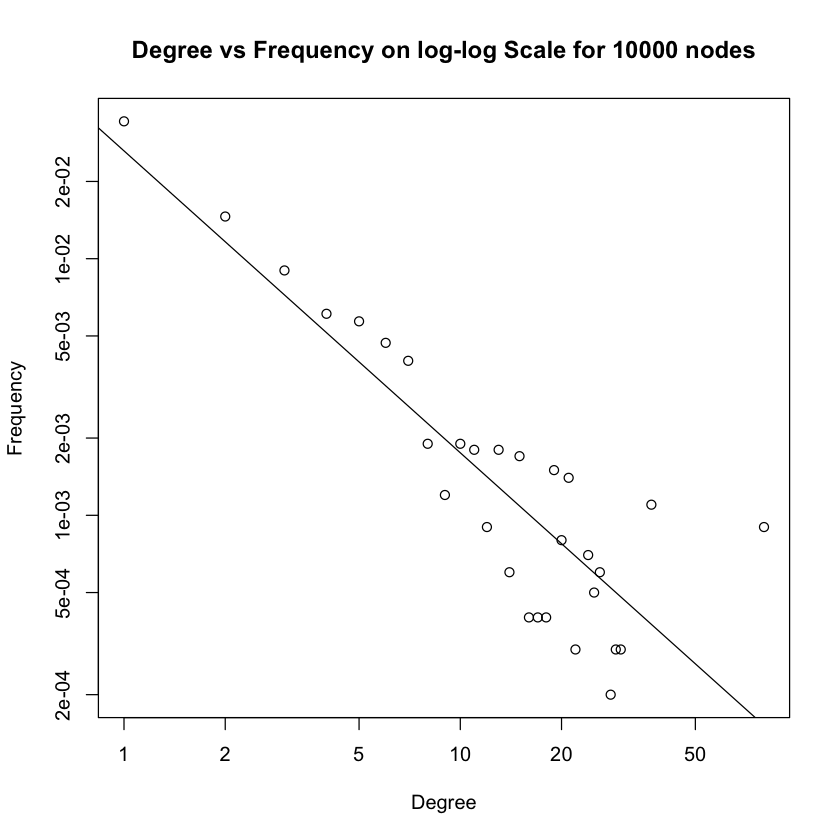

In [421]:
ldd = log(dd4,base=10)
lnodes = log(nodes,base=10)

coeff = lm(ldd~lnodes)$coefficients
plot(dd4~nodes, log="xy", main="Degree vs Frequency on log-log Scale for 10000 nodes", xlab="Degree", ylab="Frequency")  
reg=lm(ldd~lnodes)
abline(coeff[1], coeff[2])
print(coeff)

Estimate the expected degree of a node that is added at time step i for 1 ≤ i ≤ 1000. Show the relationship between the age of nodes and their expected degree through an appropriate plot.

In [431]:
iter = 1000
n = 1000
m = 1
degree_list = c(1:n)*0
for (i in 1:iter){
g_pa = sample_pa(n=n, m=m, directed = FALSE)
degree_list = degree_list+degree(g_pa)
    }


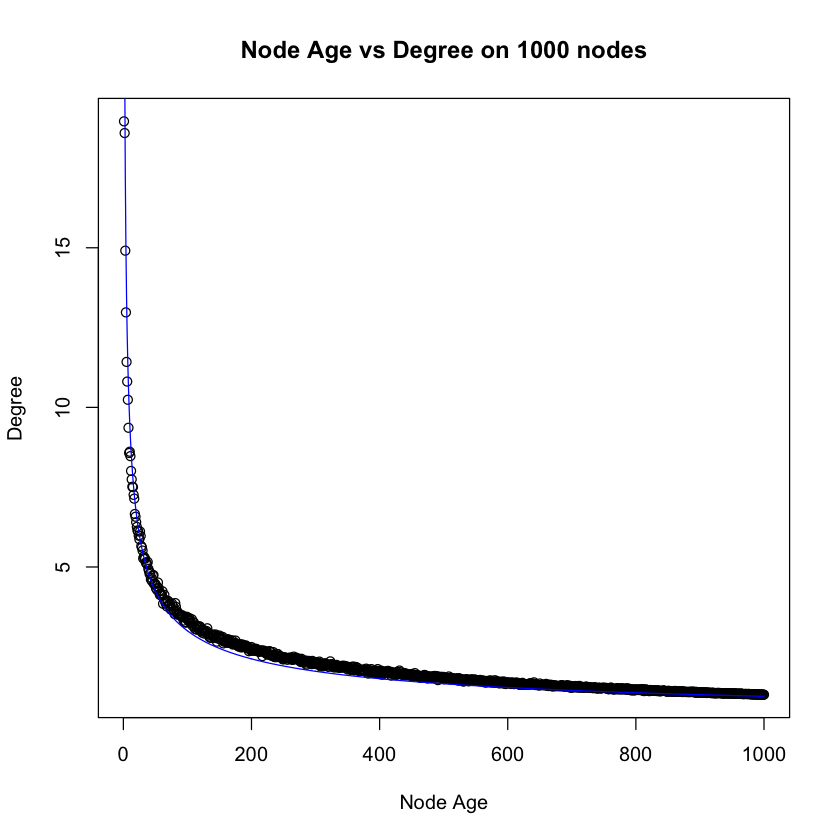

In [449]:
# print(degree_list/iter)
plot(degree_list/iter, main="Node Age vs Degree on 1000 nodes", xlab="Node Age", ylab="Degree")
lines(c(1:1000), 30* c(1:1000)^(-1/2), col="blue")
# lines(c(1:1000), 100/c(1:1000), col="green")
# lines(c(1:1000), 1/log(c(1:1000)), col="blue")
# lines(c(1:1000), 1/log(c(1:1000)), col="blue")
# print(cbind(degree_list/iter))

Repeat the previous parts for m = 2, and m = 5. Compare the results of each part for different values of m.

Is connected: TRUE 
[1] 0.523177
Is connected: TRUE 
[1] 0.5316569


Warning message in xy.coords(x, y, xlabel, ylabel, log):
“1 x value <= 0 omitted from logarithmic plot”
Warning message in xy.coords(x, y, xlabel, ylabel, log):
“33 y values <= 0 omitted from logarithmic plot”


(Intercept)      lnodes 
  0.1705575  -2.1033113 


Warning message in xy.coords(x, y, xlabel, ylabel, log):
“1 x value <= 0 omitted from logarithmic plot”
Warning message in xy.coords(x, y, xlabel, ylabel, log):
“122 y values <= 0 omitted from logarithmic plot”


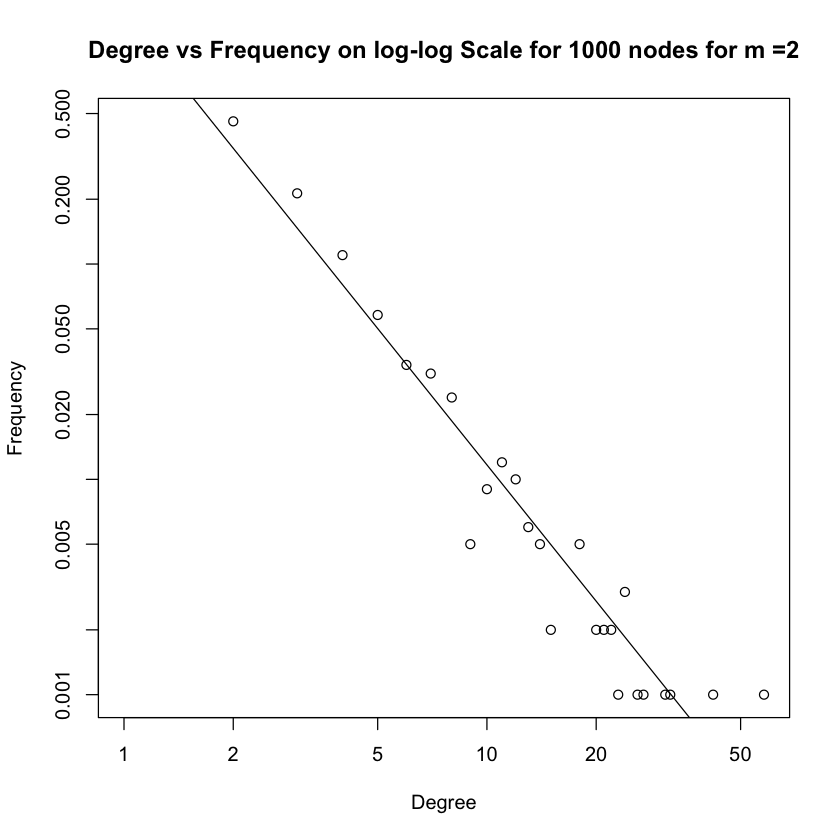

(Intercept)      lnodes 
  0.1603993  -2.3048313 


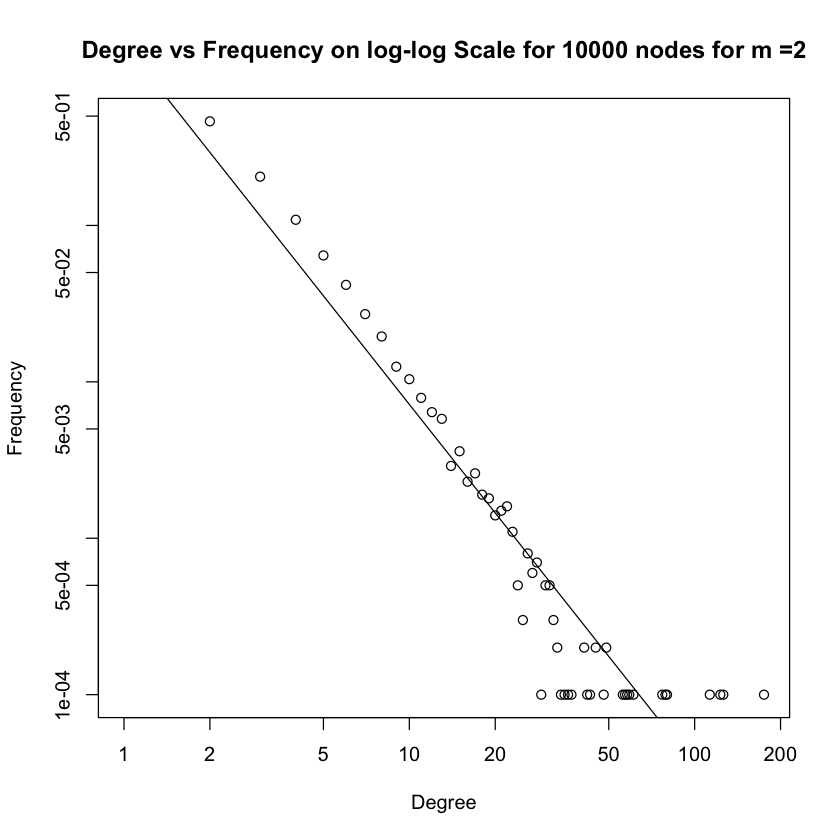

(Intercept)      lnodes 
 -0.4518508  -1.0406764 


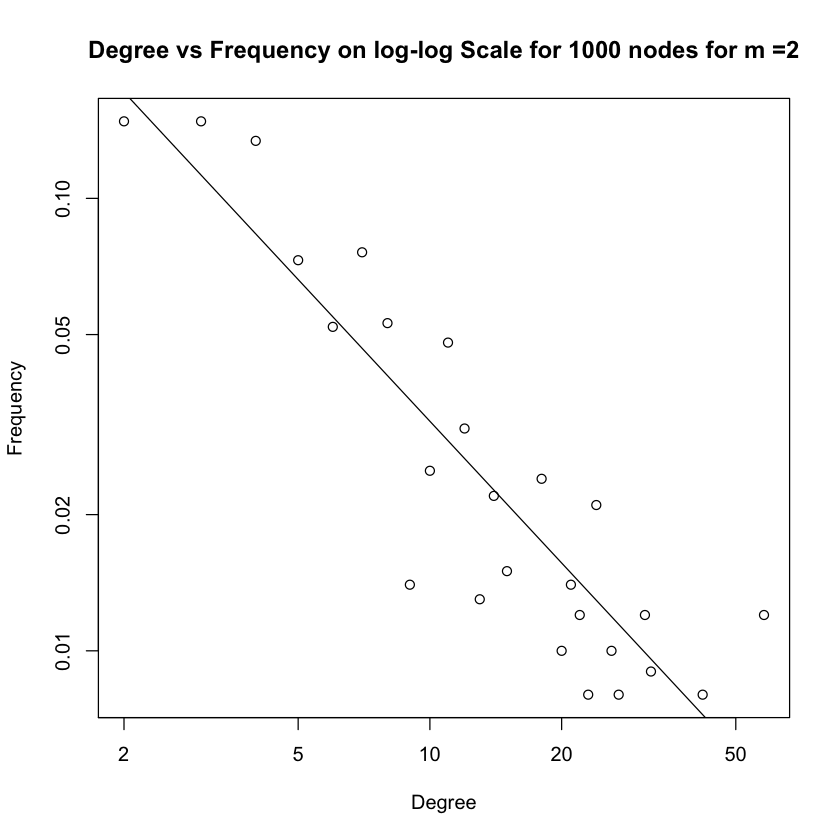

(Intercept)      lnodes 
  -1.597032   -1.116013 
          [,1]
   [1,] 37.549
   [2,] 37.815
   [3,] 37.977
   [4,] 32.045
   [5,] 27.381
   [6,] 24.740
   [7,] 22.870
   [8,] 21.195
   [9,] 20.590
  [10,] 19.391
  [11,] 18.948
  [12,] 17.267
  [13,] 17.392
  [14,] 16.420
  [15,] 16.147
  [16,] 15.086
  [17,] 14.878
  [18,] 14.942
  [19,] 14.066
  [20,] 13.786
  [21,] 13.186
  [22,] 13.498
  [23,] 12.904
  [24,] 12.830
  [25,] 12.573
  [26,] 12.410
  [27,] 12.052
  [28,] 12.024
  [29,] 11.605
  [30,] 11.364
  [31,] 10.978
  [32,] 11.488
  [33,] 11.062
  [34,] 10.446
  [35,] 10.627
  [36,] 10.436
  [37,] 10.659
  [38,] 10.324
  [39,] 10.205
  [40,] 10.176
  [41,] 10.052
  [42,]  9.705
  [43,]  9.422
  [44,]  9.360
  [45,]  9.313
  [46,]  9.420
  [47,]  9.090
  [48,]  9.178
  [49,]  9.250
  [50,]  8.817
  [51,]  8.991
  [52,]  8.800
  [53,]  8.804
  [54,]  8.674
  [55,]  8.817
  [56,]  8.536
  [57,]  8.688
  [58,]  8.638
  [59,]  8.515
  [60,]  8.490
  [61,]  8.133
  [62,]  8.267
  [63

Warning message in xy.coords(x, y, xlabel, ylabel, log):
“1 x value <= 0 omitted from logarithmic plot”
Warning message in xy.coords(x, y, xlabel, ylabel, log):
“73 y values <= 0 omitted from logarithmic plot”


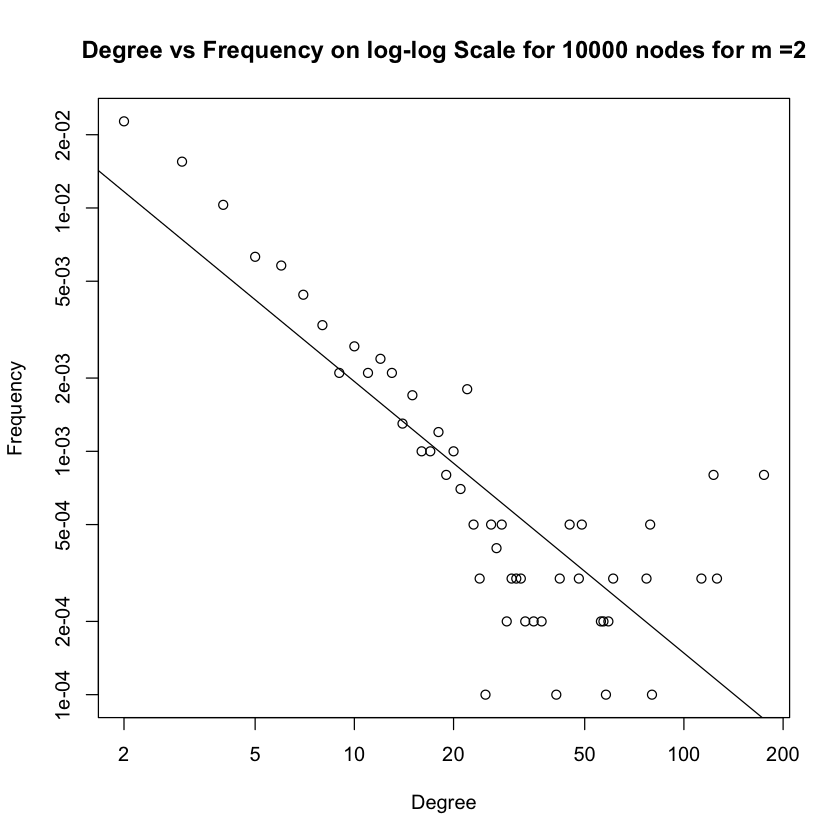

(Intercept)      lnodes 
  0.4360258  -1.9301285 


Warning message in xy.coords(x, y, xlabel, ylabel, log):
“1 x value <= 0 omitted from logarithmic plot”
Warning message in xy.coords(x, y, xlabel, ylabel, log):
“214 y values <= 0 omitted from logarithmic plot”


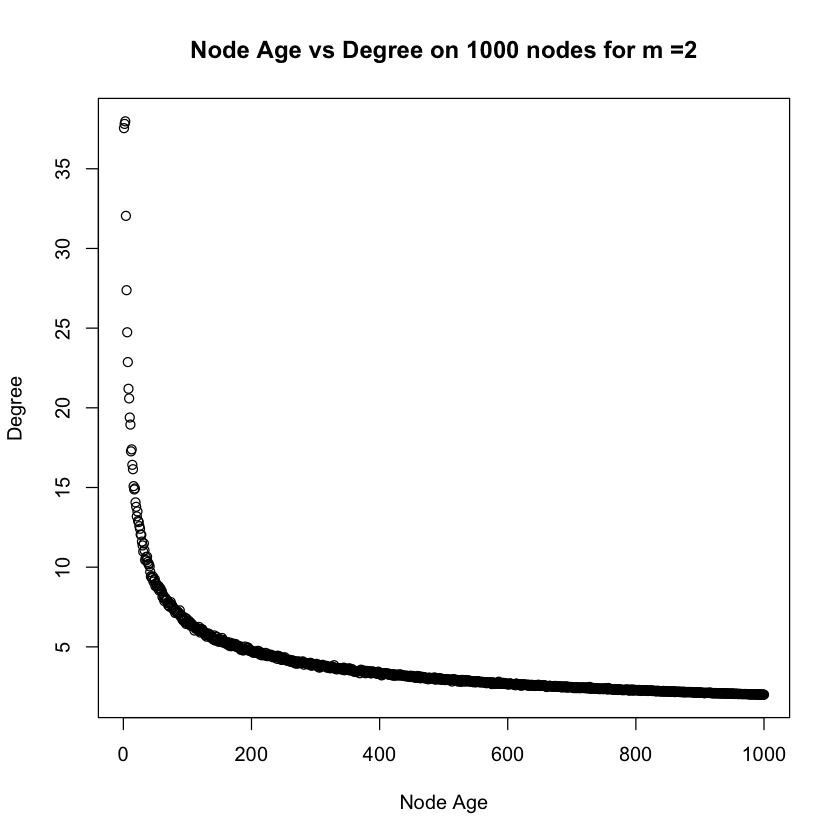

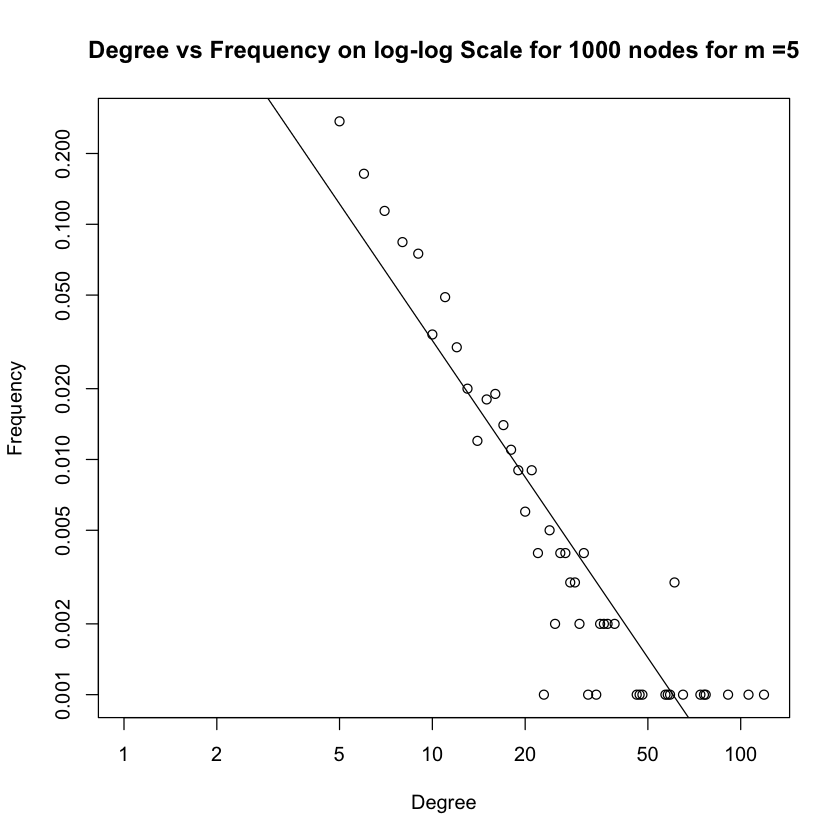

(Intercept)      lnodes 
  0.4454436  -2.1122537 


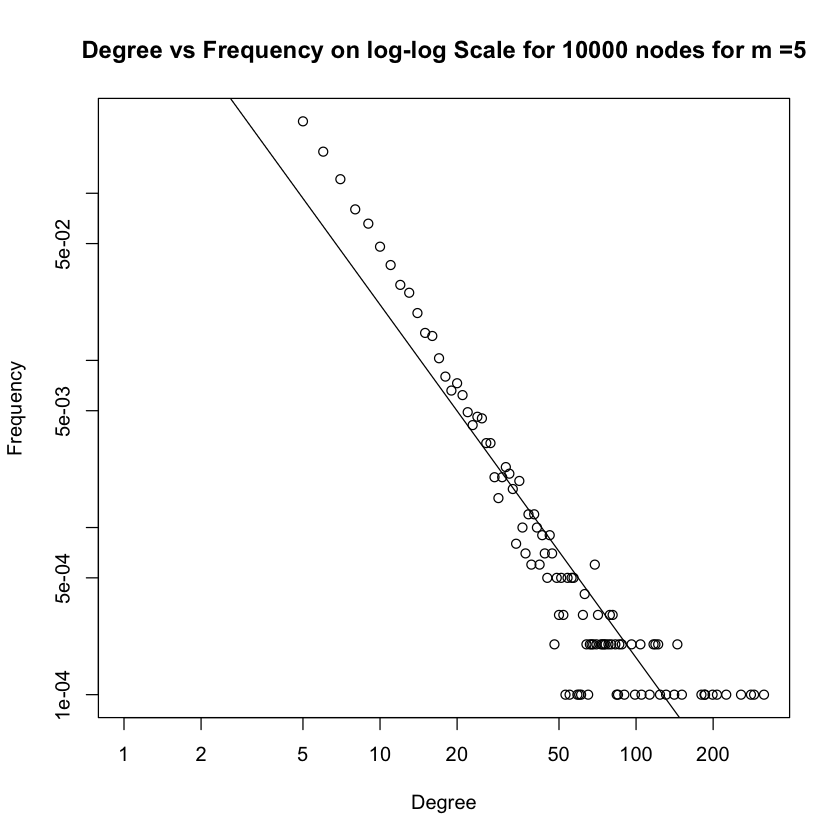

(Intercept)      lnodes 
 -0.6075894  -0.8929052 


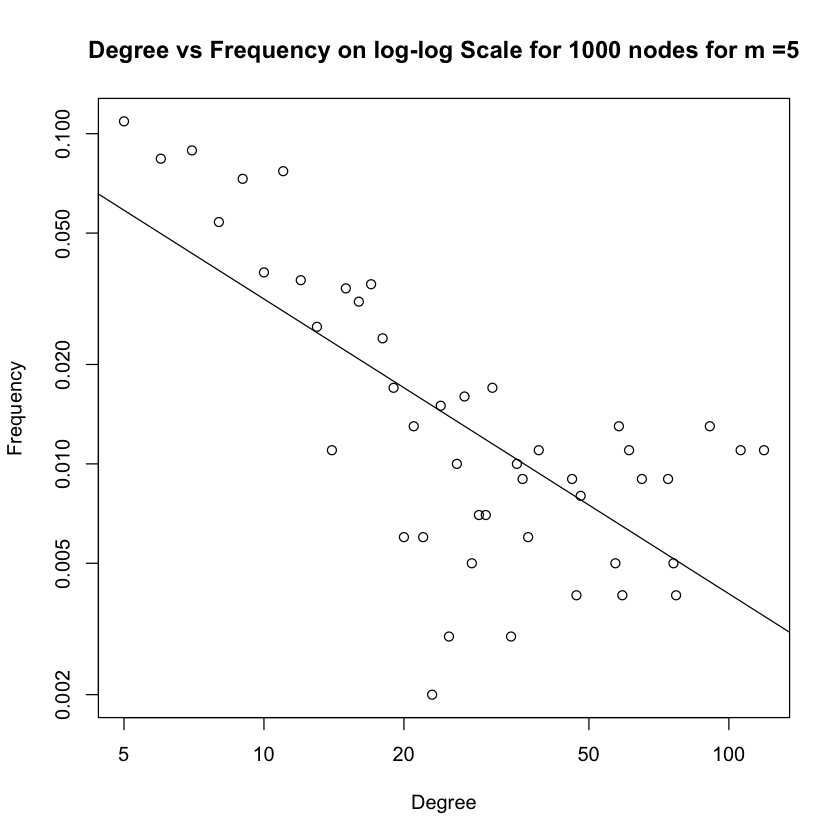

(Intercept)      lnodes 
 -1.6743664  -0.9910207 


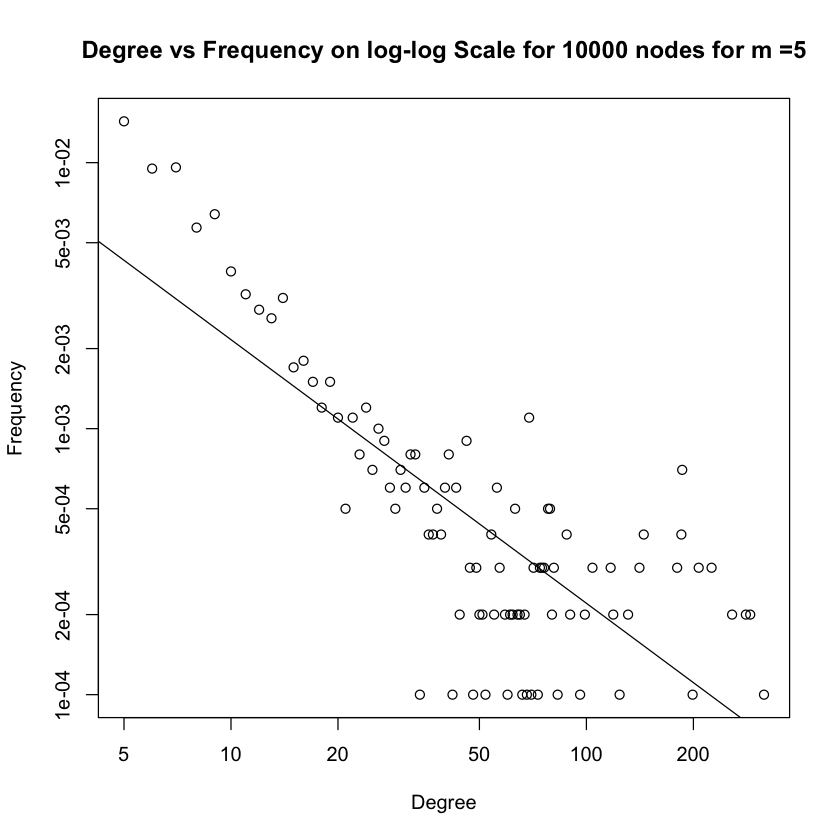

          [,1]
   [1,] 78.182
   [2,] 78.171
   [3,] 78.487
   [4,] 77.089
   [5,] 77.214
   [6,] 77.000
   [7,] 69.942
   [8,] 64.470
   [9,] 60.500
  [10,] 56.309
  [11,] 52.325
  [12,] 50.332
  [13,] 47.857
  [14,] 45.947
  [15,] 44.134
  [16,] 42.773
  [17,] 41.532
  [18,] 40.362
  [19,] 38.445
  [20,] 38.732
  [21,] 36.252
  [22,] 35.628
  [23,] 35.723
  [24,] 33.523
  [25,] 32.922
  [26,] 32.482
  [27,] 32.141
  [28,] 31.635
  [29,] 30.754
  [30,] 29.862
  [31,] 29.610
  [32,] 29.305
  [33,] 28.664
  [34,] 28.500
  [35,] 27.586
  [36,] 28.260
  [37,] 27.921
  [38,] 26.598
  [39,] 26.091
  [40,] 25.975
  [41,] 25.826
  [42,] 25.064
  [43,] 25.274
  [44,] 24.984
  [45,] 24.255
  [46,] 24.638
  [47,] 23.891
  [48,] 23.879
  [49,] 23.785
  [50,] 23.506
  [51,] 22.860
  [52,] 22.646
  [53,] 22.553
  [54,] 22.157
  [55,] 22.287
  [56,] 22.210
  [57,] 21.707
  [58,] 21.448
  [59,] 21.622
  [60,] 21.197
  [61,] 20.991
  [62,] 20.955
  [63,] 20.566
  [64,] 20.526
  [65,] 20.483
  [66,] 19

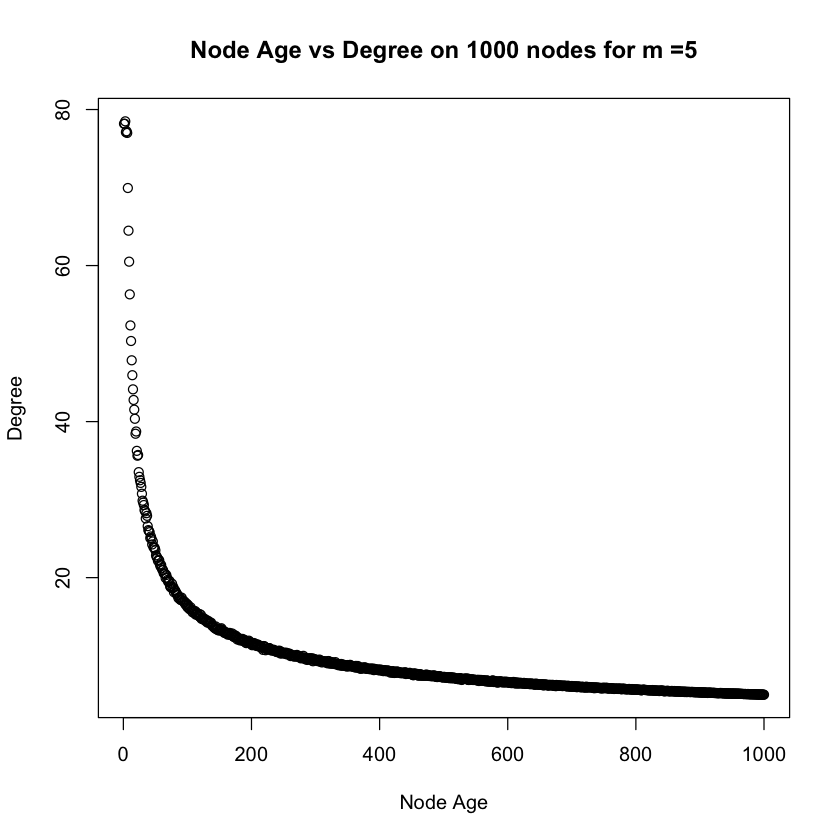

In [456]:
m_list = c(2, 5)

for (i in 1:length(m_list)){
    n = 1000
    m = m_list[i]
    g_pa = sample_pa(n=n, m=m, directed = FALSE)
    cat("Is connected:", is_connected(g_pa), "\n")
    
    comm = cluster_fast_greedy(g_pa)
    mod = modularity(comm)
    print(mod)
    
    n = 10000
    g_pa2 = sample_pa(n=n, m=m, directed = FALSE)
    cat("Is connected:", is_connected(g_pa2), "\n")
    comm2 = cluster_fast_greedy(g_pa2)
    mod2 = modularity(comm2)
    print(mod2)
    
    dd = degree_distribution(g_pa, mode="all")
    nodes = c(0:(length(dd)-1))

    ldd = log(dd,base=10)
    to_remove = which(ldd == -Inf)
    ldd = ldd[-to_remove]
    lnodes = log(nodes[-to_remove],base=10)
    coeff = lm(ldd~lnodes)$coefficients
    plot(dd~nodes, log="xy", main=paste0("Degree vs Frequency on log-log Scale for 1000 nodes for m =", m), xlab="Degree", ylab="Frequency") 
    reg=lm(ldd~lnodes)
    abline(coeff[1], coeff[2])
    print(coeff)
    
    dd2 = degree_distribution(g_pa2)
    nodes = c(0:(length(dd2)-1))

    ldd = log(dd2,base=10)
    to_remove = which(ldd == -Inf)
    ldd = ldd[-to_remove]
    lnodes = log(nodes[-to_remove],base=10)
    coeff = lm(ldd~lnodes)$coefficients
    plot(dd2~nodes, log="xy", main=paste0("Degree vs Frequency on log-log Scale for 10000 nodes for m =", m), xlab="Degree", ylab="Frequency")  
    reg=lm(ldd~lnodes)
    abline(coeff[1], coeff[2])
    print(coeff)
    
    iter = 1000
    degree_list = c(1:iter)
    for (i in 1:iter){
        i_node = sample(c(1:1000), size=1)
        j_cand = neighbors(g_pa, i_node)
        j_node = sample(j_cand, size=1)
        degree_list[i] = degree(g_pa, j_node)
    }
    dd3 = cbind(table(degree_list))/1000
    nodes = as.integer(names(table(degree_list)))
    
    ldd = log(dd3,base=10)
    lnodes = log(nodes,base=10)

    coeff = lm(ldd~lnodes)$coefficients
    plot(dd3~nodes, log="xy", main=paste0("Degree vs Frequency on log-log Scale for 1000 nodes for m =", m), xlab="Degree", ylab="Frequency")  
    reg=lm(ldd~lnodes)
    abline(coeff[1], coeff[2])
    print(coeff)
    
    iter = 1000
    degree_list = c(1:iter)
    for (i in 1:iter){
        i_node = sample(c(1:1000), size=1)
        j_cand = neighbors(g_pa2, i_node)
        j_node = sample(j_cand, size=1)
        degree_list[i] = degree(g_pa2, j_node)
    }
    dd4 = cbind(table(degree_list))/10000
    nodes = as.integer(names(table(degree_list)))
    
    ldd = log(dd4,base=10)
    lnodes = log(nodes,base=10)

    coeff = lm(ldd~lnodes)$coefficients
    plot(dd4~nodes, log="xy", main=paste0("Degree vs Frequency on log-log Scale for 10000 nodes for m =", m), xlab="Degree", ylab="Frequency")  
    reg=lm(ldd~lnodes)
    abline(coeff[1], coeff[2])
    print(coeff)
    
    iter = 1000
    n = 1000
    degree_list = c(1:n)*0
    for (i in 1:iter){
    g_pa = sample_pa(n=n, m=m, directed = FALSE)
    degree_list = degree_list+degree(g_pa)
    }
    
    plot(degree_list/iter, main=paste0("Node Age vs Degree on 1000 nodes for m =", m), xlab="Node Age", ylab="Degree")
    print(cbind(degree_list/iter))
}

Again, generate a preferential attachment network with n = 1000, m = 1. Take its degree sequence and create a new network with the same degree sequence, through stub-matching procedure. Plot both networks, mark communities on their plots, and measure their modularity. Compare the two procedures for creating random power-law networks.

[1] 36
[1] 0.933442


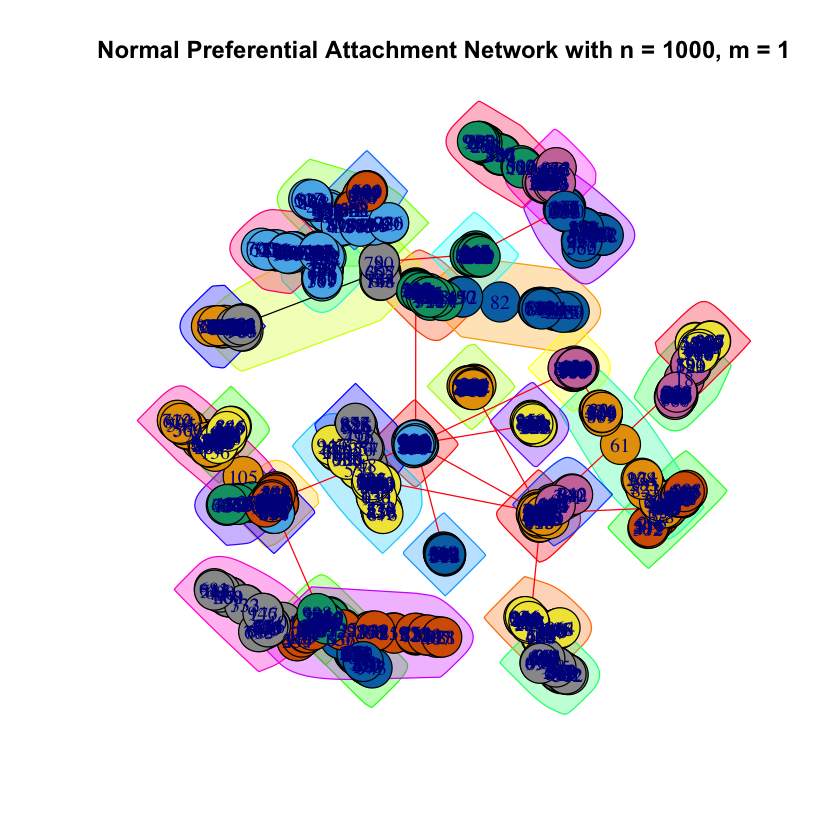

[1] 188
[1] 0.7747238


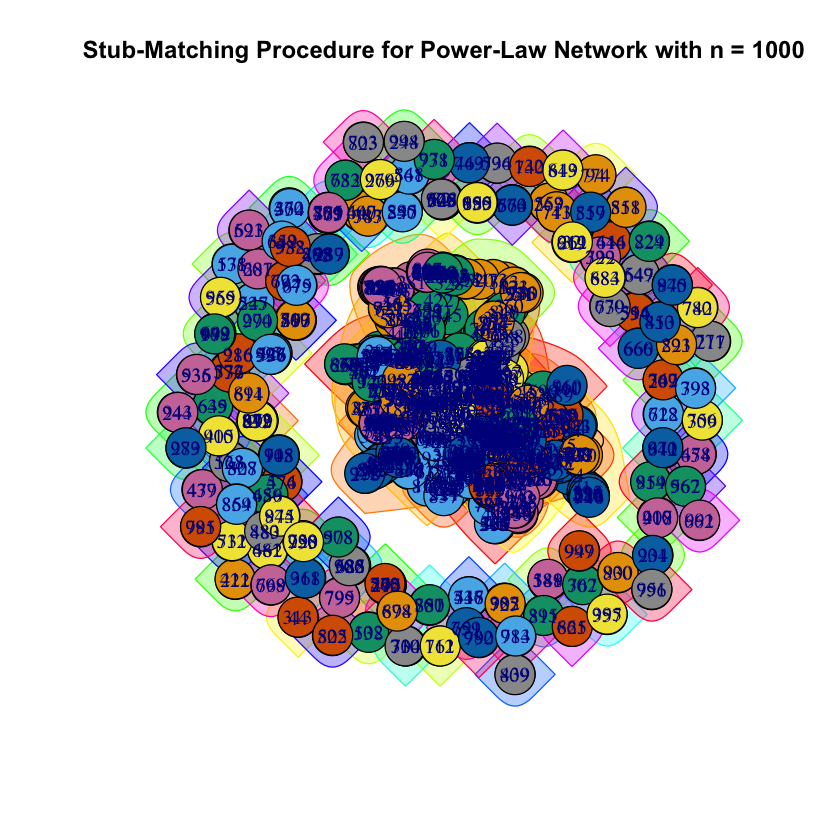

In [317]:
n = 1000
m = 1
g_pa = sample_pa(n=n, m=m, directed = FALSE)
eb = edge.betweenness.community(g_pa)
g_pa_dup = sample_degseq(degree(g_pa))
eb_dup = edge.betweenness.community(g_pa_dup)

plot(eb, g_pa, main="Normal Preferential Attachment Network with n = 1000, m = 1")

comm = cluster_fast_greedy(g_pa)
mod = modularity(comm)
print(length(comm))
print(mod)

plot(eb_dup, g_pa_dup, main="Stub-Matching Procedure for Power-Law Network with n = 1000")

comm = walktrap.community(g_pa_dup)
mod = modularity(comm)
print(length(comm))
print(mod)



## Modified Preferential Attachment Model that penalizes the Age of a Node

Produce such an undirected modified preferential attachment model that penalizes the age of a node network with 1000 nodes and parameters m = 1, α=1,β=−1,anda=c=d=1,b=0. Plot the degree distribution. What is the power law exponent?

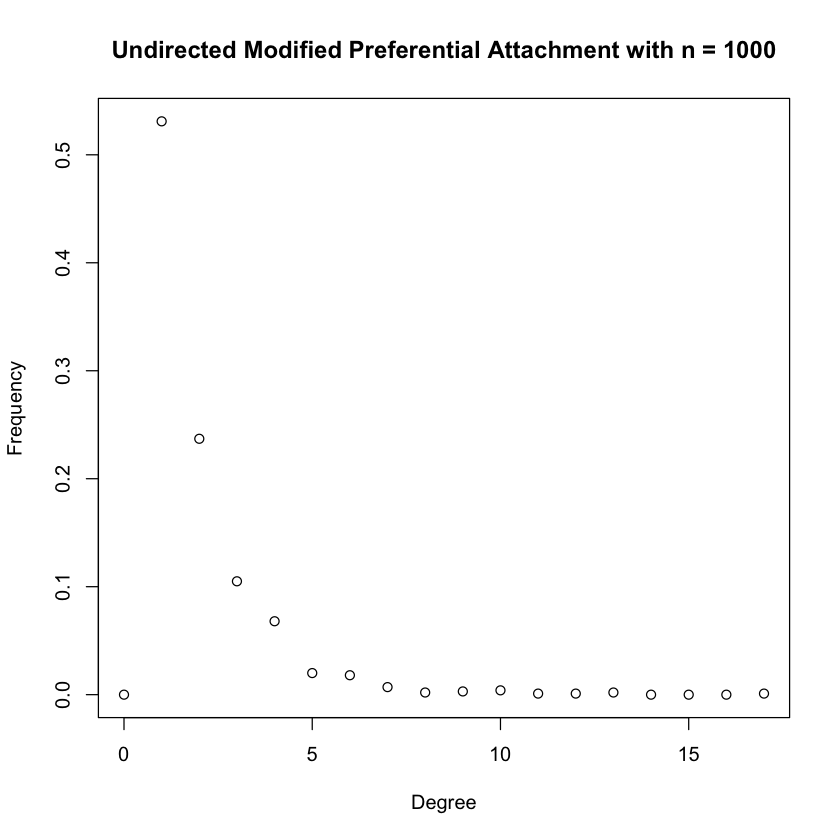

In [453]:
n = 1000
m = 1
alpha = 1
beta = -1
a = 1
c = 1
d = 1
b = 0
g_pa = sample_pa_age(n=n, m=m, pa.exp=alpha, aging.exp=beta, directed = FALSE)
dd = degree_distribution(g_pa)

plot(c(0:(length(dd)-1)), dd, main = "Undirected Modified Preferential Attachment with n = 1000", xlab = "Degree", ylab="Frequency")

Warning message in xy.coords(x, y, xlabel, ylabel, log):
“1 x value <= 0 omitted from logarithmic plot”
Warning message in xy.coords(x, y, xlabel, ylabel, log):
“4 y values <= 0 omitted from logarithmic plot”


(Intercept)      lnodes 
 0.05442371 -2.60557411 


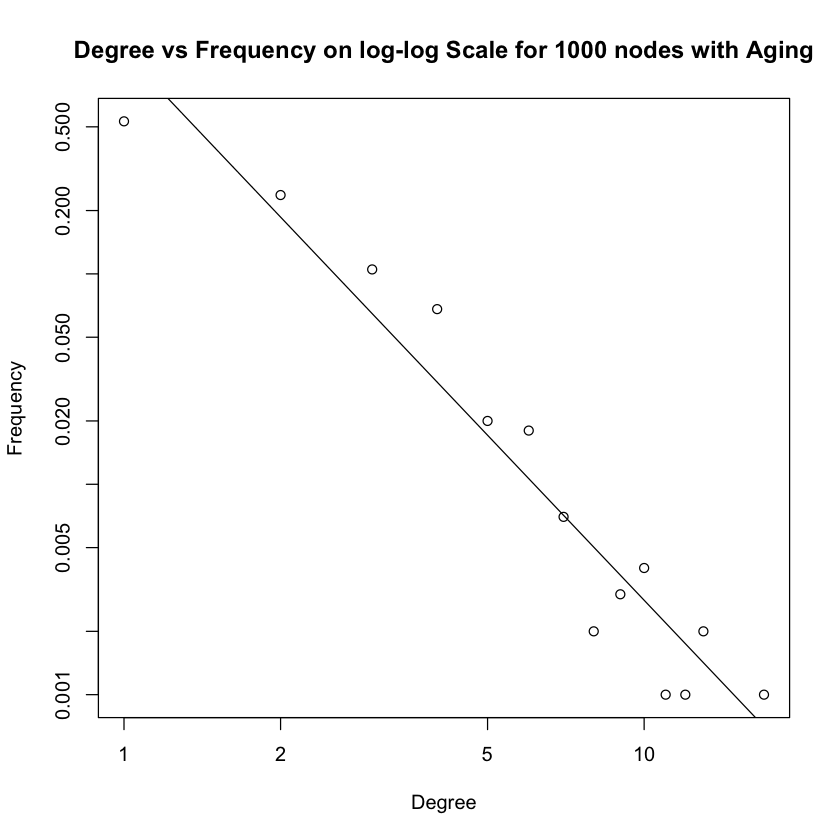

In [454]:
ldd = log(dd,base=10)
to_remove = which(ldd == -Inf)
ldd = ldd[-to_remove]
lnodes = log(c(0:(length(dd)-1)),base=10)
lnodes = lnodes[-to_remove]

coeff = lm(ldd~lnodes)$coefficients
plot(dd~c(0:(length(dd)-1)), log="xy", main=paste0("Degree vs Frequency on log-log Scale for 1000 nodes with Aging"), xlab="Degree", ylab="Frequency")  
reg=lm(ldd~lnodes)
abline(coeff[1], coeff[2])
print(coeff)

In [329]:
comm = cluster_fast_greedy(g_pa)
mod = modularity(comm)
print(length(comm))
print(mod)

[1] 33
[1] 0.9353818


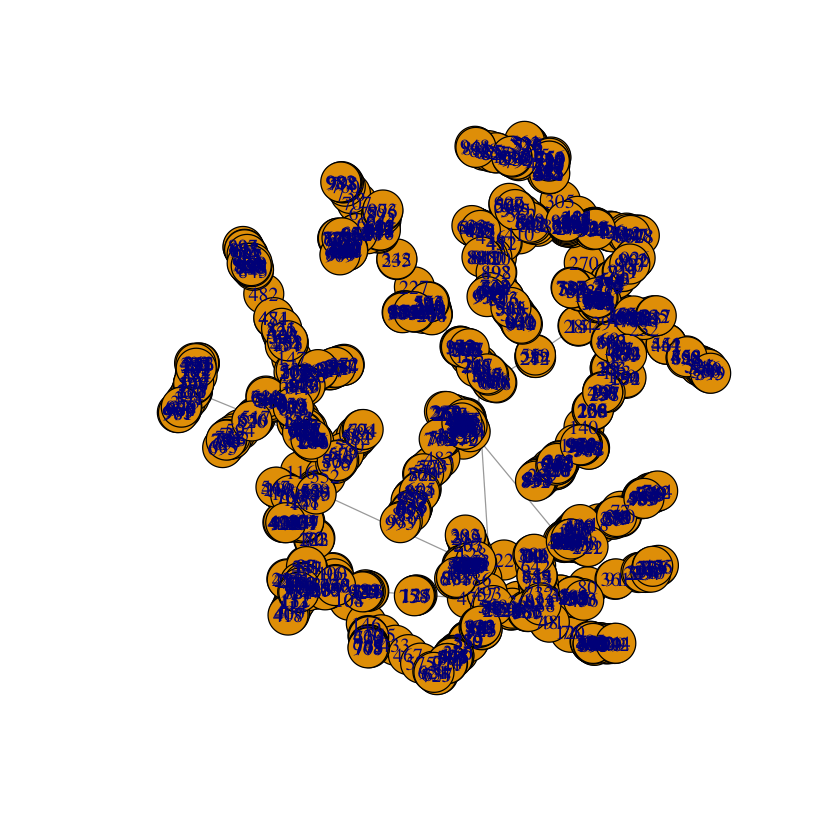

In [330]:
plot(g_pa)